# Project 2
<hr>

## Sentiment Analysis on IMDB dataset
###### by Luis Martinez
<hr>
This is a test  \ test



In [22]:
# Import libraries
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.layers import Dense, Embedding, LSTM
from keras.models import Sequential

import matplotlib.pyplot as plt

In [23]:
# Defining key values 
n_unique_words = 10000  # number of words to consider as features
maxlength      = 500    # maximum word length
batch_size     = 128

In [24]:
print('Loading data...')
(Xtrain, ytrain), (Xtest, ytest) = imdb.load_data(num_words=n_unique_words)
print(len(Xtrain), 'train sequences')
print(len(Xtest), 'test sequences')

print('Pad sequences (samples x time)')
Xtrain = sequence.pad_sequences(Xtrain, maxlen=maxlength)
Xtest  = sequence.pad_sequences(Xtest, maxlen=maxlength)
print('input_train shape:', Xtrain.shape)
print('input_test shape:', Xtest.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [30]:
# Create model
model = Sequential()
model.add(Embedding(n_unique_words, 32))
model.add(LSTM(32))
model.add(Dense(24, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [31]:
# Compile the model
#model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit model
history = model.fit(Xtrain, ytrain, 
                    batch_size=batch_size, 
                    epochs=12, 
                    validation_data=[Xtest, ytest], 
                    validation_split=0.2)

Epoch 1/12
157/157 [==============================] - 45s 272ms/step - loss: 0.4837 - accuracy: 0.7596 - val_loss: 0.3042 - val_accuracy: 0.8746
Epoch 2/12
157/157 [==============================] - 43s 273ms/step - loss: 0.2296 - accuracy: 0.9128 - val_loss: 0.2905 - val_accuracy: 0.8816
Epoch 3/12
157/157 [==============================] - 43s 271ms/step - loss: 0.1813 - accuracy: 0.9338 - val_loss: 0.3012 - val_accuracy: 0.8824
Epoch 4/12
157/157 [==============================] - 43s 274ms/step - loss: 0.1353 - accuracy: 0.9520 - val_loss: 0.3193 - val_accuracy: 0.8788
Epoch 5/12
157/157 [==============================] - 42s 270ms/step - loss: 0.1061 - accuracy: 0.9643 - val_loss: 0.3418 - val_accuracy: 0.8736
Epoch 6/12
157/157 [==============================] - 43s 272ms/step - loss: 0.0821 - accuracy: 0.9732 - val_loss: 0.4077 - val_accuracy: 0.8752
Epoch 7/12
157/157 [==============================] - 43s 274ms/step - loss: 0.0640 - accuracy: 0.9798 - val_loss: 0.4941 - val_ac

In [32]:
# Evaluate the model
_, train_acc = model.evaluate(Xtrain, ytrain, verbose = 0)
_, test_acc = model.evaluate (Xtest, ytest, verbose=0)
print('Training Accuracy: %.3f, Testing Accuracy: %.3f' % (train_acc, test_acc))

Training Accuracy: 0.969, Testing Accuracy: 0.850


Epoch 1/12
196/196 [==============================] - 182s 915ms/step - loss: 0.4217 - accuracy: 0.7960 - val_loss: 0.3036 - val_accuracy: 0.8754
Epoch 2/12
196/196 [==============================] - 177s 902ms/step - loss: 0.2319 - accuracy: 0.9107 - val_loss: 0.3481 - val_accuracy: 0.8629
Epoch 3/12
196/196 [==============================] - 181s 922ms/step - loss: 0.1772 - accuracy: 0.9353 - val_loss: 0.3577 - val_accuracy: 0.8657
Epoch 4/12
196/196 [==============================] - 195s 994ms/step - loss: 0.1337 - accuracy: 0.9524 - val_loss: 0.4213 - val_accuracy: 0.8523
Epoch 5/12
196/196 [==============================] - 194s 989ms/step - loss: 0.1329 - accuracy: 0.9522 - val_loss: 0.5551 - val_accuracy: 0.8503
Epoch 6/12
196/196 [==============================] - 191s 975ms/step - loss: 0.0944 - accuracy: 0.9675 - val_loss: 0.5087 - val_accuracy: 0.8564
Epoch 7/12
196/196 [==============================] - 193s 987ms/step - loss: 0.0666 - accuracy: 0.9781 - val_loss: 0.5031 -

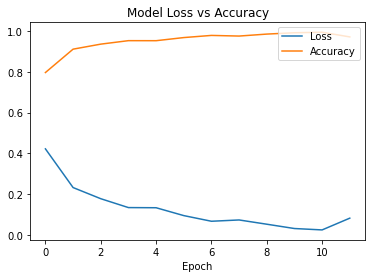

In [1]:
# Text classification on IMDB dataset using Keras and bi-LSTM network

import numpy as np
from keras.datasets import imdb
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from keras.models import Sequential
from keras.preprocessing import sequence
from matplotlib import pyplot

n_unique_words = 10000  # cut texts after this number of words
maxlen = 200
batch_size = 128

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=n_unique_words)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
y_train = np.array(y_train)
y_test = np.array(y_test)

model = Sequential()
model.add(Embedding(n_unique_words, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=12, validation_data=[x_test, y_test])
print(history.history['loss'])
print(history.history['accuracy'])

pyplot.plot(history.history['loss'])
pyplot.plot(history.history['accuracy'])
pyplot.title('Model Loss vs Accuracy')
pyplot.xlabel('Epoch')
pyplot.legend(['Loss', 'Accuracy'], loc='upper right')
pyplot.show()

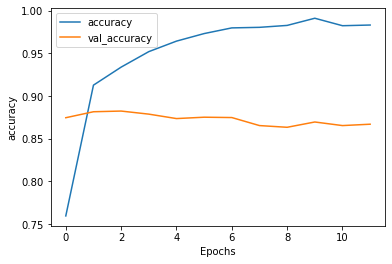

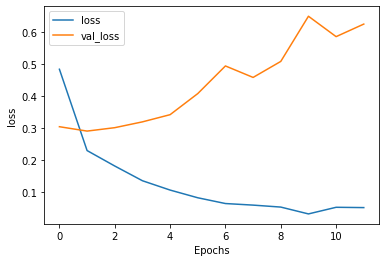

In [33]:
# Plotting results

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")